# Business Performance Analysis

**Research Objective**
The goal of this marketing research is to determine why an entertainment app has been experiencing financial losses over the past few months and to develop data-driven recommendations to help the company return to profitability.

**Dataset Overview**
The analysis is based on three datasets:

- `visits_info_short.csv` – Contains server logs with website visit details.
- `orders_info_short.csv` – Stores purchase transaction data.
- `costs_info_short.csv` – Includes advertising expenses.

**Structure of `visits_info_short.csv`**
- `User Id` – Unique user identifier
- `Region` – User’s country
- `Device` – Type of user’s device
- `Channel` – Traffic source identifier
- `Session Start` – Session start date and time
- `Session End` – Session end date and time

**Structure of `orders_info_short.csv`**
- `User Id` – Unique user identifier
- `Event Dt` – Purchase date and time
- `Revenue` – Order amount

**Structure of `costs_info_short.csv`**
- `dt` – Advertising campaign date
- `Channel` – Advertising source identifier
- `costs` – Campaign expenses

**Research Plan (6 Steps)**
- Data loading and preprocessing
- Defining functions to calculate and analyze LTV, ROI, retention, and conversion rates
- Exploratory data analysis (EDA)
- Marketing strategy analysis
- Advertising cost-effectiveness assessment
- Conclusions and recommendations

## Step: Data Loading and Preparation

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
# Loading the Datasets
visits = pd.read_csv('/datasets/visits_info_short.csv')  # Session log
orders = pd.read_csv('/datasets/orders_info_short.csv')  # Purchase transactions
costs = pd.read_csv('/datasets/costs_info_short.csv')  # Advertising expenses

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [5]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [6]:
# Displaying general information about each dataset
print("Information about 'visits' dataset:")
visits.info()
print("\nInformation about 'orders' dataset:")
orders.info()
print("\nInformation about 'costs' dataset:")
costs.info()

Information about 'visits' dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

Information about 'orders' dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

Information about 'costs' dataset:
<class 'pan

In [7]:
# Renaming columns to snake_case for uniformity
visits.rename(columns={
    'User Id': 'user_id',
    'Region': 'region',
    'Device': 'device',
    'Channel': 'channel',
    'Session Start': 'session_start',
    'Session End': 'session_end'
}, inplace=True)

orders.rename(columns={
    'User Id': 'user_id',
    'Event Dt': 'event_dt',
    'Revenue': 'revenue'
}, inplace=True)

costs.rename(columns={
    'Channel': 'channel'
}, inplace=True)

In [8]:
# Converting date columns to datetime format for analysis
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [9]:
# Analyzing the distribution of key categorical variables
print("\nDistribution of 'region' in 'visits':")
print(visits['region'].value_counts())
print("\nDistribution of 'device' in 'visits':")
print(visits['device'].value_counts())
print("\nDistribution of 'channel' in 'visits':")
print(visits['channel'].value_counts())
print("\nDistribution of 'revenue' in 'orders':")
print(orders['revenue'].value_counts())
print("\nDistribution of 'channel' in 'costs':")
print(costs['channel'].value_counts())


Distribution of 'region' in 'visits':
United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

Distribution of 'device' in 'visits':
iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

Distribution of 'channel' in 'visits':
organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

Distribution of 'revenue' in 'orders':
4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

Distribution of 'channel' in 'costs':
OppleCreativeMedia    180
RocketSuperAds        180
YRabbit               180
AdNonSense            180
TipTop                180
W

### Interim Conclusions

- No missing values, duplicates, or inconsistencies were found across all three datasets.
- Column names have been standardized to snake_case.
- Datetime columns have been appropriately converted for time-based analyses.

## Step: Defining Functions for Calculating and Analyzing LTV, ROI, Retention, and Conversion

### Function to Create User Profiles (`get_profiles`)

In [10]:
def get_profiles(visits, orders, costs):
    """
    This function creates user profiles by:
    - Capturing first visit details (session start, channel, device, region).
    - Calculating user acquisition cost and adding payer status.
    - Grouping users based on acquisition date and channel.
    
    Parameters:
    - visits: DataFrame with user session data.
    - orders: DataFrame with user order details.
    - costs: DataFrame with advertising costs.

    Returns:
    - profiles: DataFrame containing user profiles with acquisition costs and payer status.
    """
    
    # Find the details of the first visit for each user
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',  # First session timestamp
                'channel': 'first',       # First acquisition channel
                'device': 'first',        # First device used
                'region': 'first',        # First region
            }
        )
        .rename(columns={'session_start': 'first_ts'})  # Rename 'session_start' to 'first_ts'
        .reset_index()
    )

    # For cohort analysis, extract the first visit date and the first day of the month it occurred
    profiles['dt'] = profiles['first_ts'].dt.date  # Date of the first visit
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')  # Month of the first visit

    # Add a column to indicate paying users (users who made a purchase)
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())  # Flag for paying users

    # Calculate the number of unique users with the same acquisition channel and date
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})  # Count unique users per day and channel
        .rename(columns={'user_id': 'unique_users'})  # Rename to 'unique_users'
        .reset_index()
    )

    # Merge the advertising costs with the count of new users per channel and date
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # Calculate the acquisition cost per user by dividing total costs by the number of unique users
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # Add acquisition cost to the user profiles
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],  # Select relevant columns
        on=['dt', 'channel'],  # Merge on date and channel
        how='left',
    )

    # For organic users (no advertising spend), set acquisition cost to 0
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles  # Return the generated user profiles

In [11]:
profiles = get_profiles(visits, orders, costs)  # Ensure this is run first
print(profiles.head(5)) 

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


### Function to Calculate Retention (`get_retention`)

In [12]:
def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    """
    Calculate user retention over a specified time horizon, segmented by specified dimensions.
    
    Parameters:
    - profiles: user profiles DataFrame, including first visit details and user status (payer).
    - visits: user visit data, containing timestamps for each session.
    - observation_date: the date from which the retention analysis starts.
    - horizon_days: the number of days to track user retention.
    - dimensions: a list of additional dimensions (e.g., payer status, region) to segment the analysis.
    - ignore_horizon: a flag to ignore the horizon for retention calculation.
    
    Returns:
    - result_raw: raw retention data with user lifetime details.
    - result_grouped: retention rate grouped by dimensions and lifetime.
    - result_in_time: retention over time for each dimension.
    """
    
    # Add 'payer' to the dimensions list to include it in the analysis
    dimensions = ['payer'] + dimensions

    # Exclude users who did not meet the retention horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Merge visit data and calculate user lifetime
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # Function to group the data by the selected dimensions and calculate retention
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # Get the retention table grouped by dimensions
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # Get the retention dynamics over time
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # Return raw retention data, grouped retention data, and retention over time
    return result_raw, result_grouped, result_in_time

### Function to Calculate Conversion Rate (`get_conversion`)

In [13]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    """
    This function calculates the conversion rate for users within a given cohort.
    
    Parameters:
    - profiles: DataFrame containing user profiles with first session details.
    - purchases: DataFrame containing user purchase data.
    - observation_date: the last date to consider for analysis.
    - horizon_days: the number of days within which to track the conversion.
    - dimensions: additional dimensions (e.g., payer status, channel) to group the results.
    - ignore_horizon: if True, no horizon is applied for filtering users.
    
    Returns:
    - result_raw: raw data with user conversions.
    - result_grouped: conversion rates grouped by the specified dimensions.
    - result_in_time: conversion rates over time (by date).
    """
    
    # Exclude users who did not make it to the specified observation date or horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    
    # Filter users who have been acquired before the last suitable acquisition date
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Get the date and time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})  # Get the first purchase date for each user
        .reset_index()
    )

    # Merge the purchase data with the user profile data
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # Calculate the 'lifetime' for each purchase (days since first session)
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # If no dimensions are provided, add 'cohort' as a default grouping factor
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # Helper function to group data by the specified dimensions and calculate conversion rates
    def group_by_dimensions(df, dims, horizon_days):
        # Create a pivot table with the lifetime as columns and count of users as values
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)  # Cumulative sum to account for users across multiple days
        
        # Calculate the cohort size for each group
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        
        # Merge the cohort size with the result
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # Calculate the conversion rate by dividing each cell by the cohort size
        result = result.div(result['cohort_size'], axis=0)
        
        # Keep only the conversion rates for the first 'horizon_days' days
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        
        return result

    # Calculate conversion rates grouped by the specified dimensions
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # If 'cohort' was added to dimensions, remove it to avoid redundancy
    if 'cohort' in dimensions: 
        dimensions = []

    # Calculate the conversion rates over time (by date)
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # Return the raw data, grouped conversion rates, and conversion rates over time
    return result_raw, result_grouped, result_in_time

### Function to Calculate LTV and ROI (`get_ltv`)

In [14]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    """
    This function calculates the Lifetime Value (LTV) and Return on Investment (ROI)
    for users within a given cohort over a defined horizon.
    
    Parameters:
    - profiles: DataFrame containing user profiles with their first session details.
    - purchases: DataFrame containing user purchase data including revenue.
    - observation_date: The last date to consider for analysis.
    - horizon_days: The number of days to track LTV and ROI after the first session.
    - dimensions: Additional dimensions (e.g., payer status, channel) to group the results.
    - ignore_horizon: If True, no horizon is applied for filtering users.
    
    Returns:
    - result_raw: Raw data with user LTV and revenue information.
    - result_grouped: LTV calculated by cohort.
    - result_in_time: LTV over time (by date).
    - roi_grouped: ROI calculated by cohort.
    - roi_in_time: ROI over time (by date).
    """
    
    # Exclude users who did not survive up to the specified observation date or horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    
    # Filter users who were acquired before the last suitable acquisition date
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Merge purchase data with profiles, adding revenue data to the profiles
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )

    # Calculate 'lifetime' for each purchase (days since first session)
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # If no dimensions are provided, default to grouping by cohort (All users)
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # Helper function to group data by the specified dimensions and calculate LTV and ROI
    def group_by_dimensions(df, dims, horizon_days):
        # Create a pivot table for revenue, summing up the revenue for each lifetime value
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # Calculate cumulative revenue for each lifetime value
        result = result.fillna(0).cumsum(axis=1)
        
        # Calculate cohort sizes (unique users per cohort)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        
        # Merge cohort sizes with the revenue data
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # Calculate LTV by dividing the total revenue by the cohort size
        result = result.div(result['cohort_size'], axis=0)
        
        # Limit the columns to the horizon_days to avoid exceeding the analysis window
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        # Restore the cohort size column
        result['cohort_size'] = cohort_sizes

        # Prepare a dataframe with user acquisition cost (CAC) for each cohort
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # Calculate the average CAC per cohort
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # Calculate ROI by dividing LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # Remove rows with infinite ROI (possible when CAC is 0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # Restore the cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes

        # Add CAC in the ROI table
        roi['cac'] = cac['cac']

        # Final ROI table with cohort size, CAC, and ROI for each lifetime value
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # Return the LTV and ROI tables
        return result, roi

    # Calculate LTV and ROI for each cohort
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # For dynamic tables, remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # Calculate dynamic LTV and ROI over time (by date)
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # Return the raw data, LTV tables, ROI tables
    return (
        result_raw,  # Raw data
        result_grouped,  # LTV by cohort
        result_in_time,  # Dynamic LTV by date
        roi_grouped,  # ROI by cohort
        roi_in_time,  # Dynamic ROI by date
    )

### Functions for Visualizing Metrics — `filter_data()`, `plot_retention()`, `plot_conversion()`, and `plot_ltv_roi()`.

In [15]:
# Function to smooth the frame
def filter_data(df, window):
    # Apply rolling mean to each column
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [16]:
# Function to visualize retention
def plot_retention(retention, retention_history, horizon, window=7):

    # Set grid size for the plots
    plt.figure(figsize=(15, 10))

    # Remove cohort size and retention for the first day
    retention = retention.drop(columns=['cohort_size', 0])
    # In the retention history table, keep only the necessary lifetime
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # If the retention table has only 'payer' in the index,
    # add a second attribute — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # The plot has two columns and two rows, four cells
    # In the first cell, plot retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of Paying Users')

    # In the second cell, plot retention curves for non-paying users
    # The vertical axis is shared with the first plot
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of Non-Paying Users')

    # In the third cell, plot the dynamics of retention for paying users
    ax3 = plt.subplot(2, 2, 3)
    # Get column names for the pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # Filter the data and plot the chart
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition Date')
    plt.title(
        'Retention Dynamics of Paying Users on Day {}'.format(horizon)
    )

    # In the fourth cell, plot the dynamics of retention for non-paying users
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # Filter the data and plot the chart
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Acquisition Date')
    plt.title(
        'Retention Dynamics of Non-Paying Users on Day {}'.format(horizon)
    )
    
    plt.tight_layout()
    plt.show()

In [17]:
# Function to visualize conversion
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # Set grid size for the plots
    plt.figure(figsize=(15, 5))

    # Remove cohort size
    conversion = conversion.drop(columns=['cohort_size'])
    # In the conversion history table, keep only the necessary lifetime
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # First plot — conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('User Conversion')

    # Second plot — conversion dynamics
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # The columns of the pivot table will be all the index columns except for the date
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition Date')
    plt.title('User Conversion Dynamics on Day {}'.format(horizon))

    plt.tight_layout()
    plt.show()

In [18]:
# Function to visualize LTV and ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # Set the grid for the plot
    plt.figure(figsize=(20, 10))

    # Remove cohort sizes from the LTV table
    ltv = ltv.drop(columns=['cohort_size'])
    # In the LTV history table, keep only the necessary lifetime
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # Save the customer acquisition cost (CAC) in a separate dataframe
    cac_history = roi_history[['cac']]

    # Remove cohort sizes and CAC from the ROI table
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # In the ROI history table, keep only the necessary lifetime
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # First plot — LTV curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # Second plot — LTV dynamics
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # The columns of the pivot table will be all index columns except for the date
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition Date')
    plt.title('LTV Dynamics on Day {}'.format(horizon))

    # Third plot — CAC dynamics
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # The columns of the pivot table will be all index columns except for the date
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition Date')
    plt.title('Customer Acquisition Cost Dynamics')

    # Fourth plot — ROI curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Break-even Level')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # Fifth plot — ROI dynamics
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # The columns of the pivot table will be all index columns except for the date
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Break-even Level')
    plt.xlabel('Acquisition Date')
    plt.title('ROI Dynamics on Day {}'.format(horizon))

    plt.tight_layout()
    plt.show()

## Step. Exploratory Data Analysis (EDA)

- Create user profiles. Determine the minimum and maximum acquisition dates for users.

In [19]:
profiles = get_profiles(visits, orders, costs) # get user profiles
print(profiles.head(5))

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


In [20]:
# Get the minimum and maximum acquisition dates of users
profiles.agg({'first_ts': ['min', 'max']})

,first_ts
min,2019-05-01 00:00:41
max,2019-10-27 23:59:04


> We have created user profiles, with the minimum user acquisition date being May 1, 2019, and the maximum being October 27, 2019.

In [21]:
# Group by region to calculate the number of users and the proportion of paying users from each country
region_stats = profiles.groupby('region').agg({
    'user_id': 'count',  # Count the number of users
    'payer': 'mean',  # Calculate the mean of payer to get the proportion of paying users
}).sort_values(by='payer', ascending=False)

# Highlight the max and min values in 'user_id' and 'payer' columns
region_stats_styled = region_stats.style.apply(
    lambda x: ['background-color: green' if v == x.max() else 'background-color: red' if v == x.min() else '' for v in x],
    subset=['user_id', 'payer'],
    axis=0
)

# Display the styled DataFrame
region_stats_styled

,user_id,payer
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


> - The USA has the largest number of users (about 100k), and it also has the highest proportion of paying users (7%).
> - Germany has the fewest users (about 15k), but France has the lowest proportion of paying users (about 3.8%).

In [22]:
# Group by device to calculate the number of users and the proportion of paying users for each device
device_stats = profiles.groupby('device').agg({
    'user_id': 'count',  # Count the number of users
    'payer': 'mean',  # Calculate the mean of payer to get the proportion of paying users
}).sort_values(by='payer', ascending=False)

# Highlight the max and min values in 'user_id' and 'payer' columns
device_stats_styled = device_stats.style.apply(
    lambda x: ['background-color: green' if v == x.max() else 'background-color: red' if v == x.min() else '' for v in x],
    subset=['user_id', 'payer'],
    axis=0
)

# Display the styled DataFrame
device_stats_styled


,user_id,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


> Most users use iPhones (more than 54k), but paying users prefer Macs (30k), although the difference from iPhone and Android users is only 0.1%.

In [23]:
# Group by channel to calculate the number of users and the proportion of paying users for each acquisition channel
channel_stats = profiles.groupby('channel').agg({
    'user_id': 'count',  # Count the number of users
    'payer': 'mean',  # Calculate the mean of payer to get the proportion of paying users
}).sort_values(by='payer', ascending=False)

# Highlight the max and min values in 'user_id' and 'payer' columns
channel_stats_styled = channel_stats.style.apply(
    lambda x: ['background-color: green' if v == x.max() else 'background-color: red' if v == x.min() else '' for v in x],
    subset=['user_id', 'payer'],
    axis=0
)

# Display the styled DataFrame
channel_stats_styled

,user_id,payer
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


> - Excluding users who came through organic channels, FaceBoom is the largest source of new customers (more than 29k) and also attracted the highest proportion of paying users (12%).
> - The least effective source was OppleCreativeMedia (8,605 new users and 2,7% paying users).

### Interim Conclusions

In this step, we created user profiles and determined the earliest user acquisition date (May 1, 2019) and the latest acquisition date (October 27, 2019).

- The largest user base comes from the USA, with approximately **100,000 users**, and the highest proportion of paying users (7%).
- The smallest user base is in **Germany** (around **15,000 users**), while **France** has the lowest percentage of paying users, with only about **3.8%**.
- The majority of users use **iPhones** (over **54,000 users**), but paying users tend to prefer **Mac** (around **30,000 users**), with only a **0.1% difference** between Mac and iPhone users for paying customers.

Regarding acquisition channels:

- Excluding **organic** users, the largest source of new users is **FaceBoom**, with over **29,000 users**, which also contributes the highest proportion of paying users at **12%**.
- The least effective acquisition source is **OppleCreativeMedia**, which brought in **8,605 new users**, with only **2.7%** of them converting to paying users.

## Step. Marketing Strategy Analysis

In [24]:
# Calculate the total sum of marketing expenses
total_acquisition_cost = profiles['acquisition_cost'].sum()
print(f"Total marketing expenditure: {total_acquisition_cost:.2f}")

Total marketing expenditure: 105497.30


In [25]:
# Group by acquisition channel and calculate the total spending per channel
channel_spending = profiles.groupby('channel').agg({'acquisition_cost': 'sum'}).sort_values(by='acquisition_cost', ascending=False)

# Highlight the channel with the highest and lowest spend using color
def highlight_max_min(val):
    color = 'red' if val == channel_spending['acquisition_cost'].max() else ('green' if val == channel_spending['acquisition_cost'].min() else '')
    return f'background-color: {color}'

# Apply the highlighting function to the channel spending DataFrame
channel_spending.style.applymap(highlight_max_min, subset=['acquisition_cost'])

,acquisition_cost
channel,
TipTop,54751.300000
FaceBoom,32445.600000
WahooNetBanner,5151.000000
AdNonSense,3911.250000
OppleCreativeMedia,2151.250000
RocketSuperAds,1833.000000
LeapBob,1797.600000
lambdaMediaAds,1557.600000
MediaTornado,954.480000


> Expenditure Distribution:
> - The highest amount was spent on the TipTop acquisition channel, with a total of almost 55,000. Interestingly, TipTop ranked only 4th in the user acquisition list.
> - The YRabbit channel had the lowest expenditure.

### Weekly Marketing Expenditure Dynamics

In [26]:
# Convert the 'dt' column to datetime and create columns for week and month
costs['week'] = costs['dt'].astype('datetime64[W]')
costs['month'] = costs['dt'].astype('datetime64[M]')

In [27]:
# Pivot the data to calculate weekly costs per channel
costs_dynamics_w = costs.pivot_table(
    index='week', columns='channel', values='costs', aggfunc='sum'
)

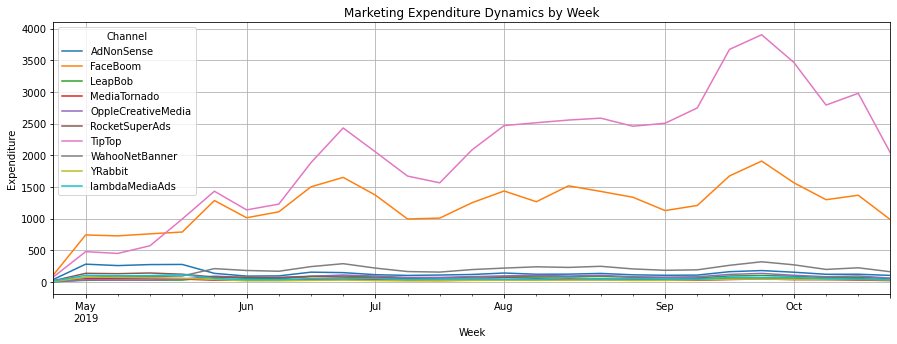

In [28]:
# Plot weekly dynamics
costs_dynamics_w.plot(figsize=(15, 5), grid=True)
plt.title('Marketing Expenditure Dynamics by Week')
plt.xlabel('Week')
plt.ylabel('Expenditure')
plt.legend(title='Channel')
plt.show()

### Monthly Marketing Expenditure Dynamics

In [29]:
# Pivot the data to calculate monthly costs per channel
costs_dynamics_m = costs.pivot_table(
    index='month', columns='channel', values='costs', aggfunc='sum'
)

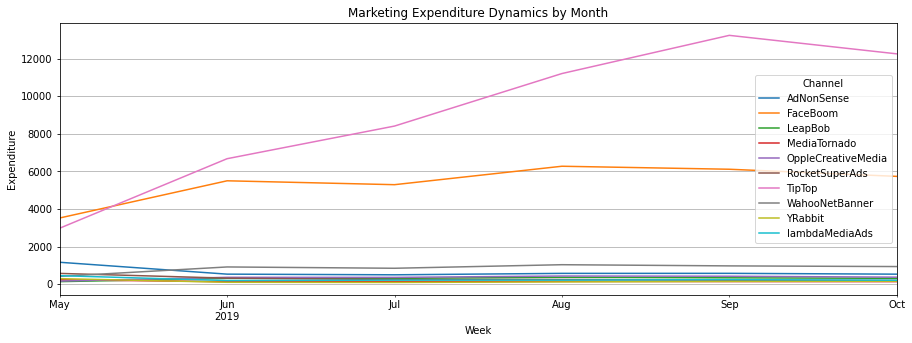

In [30]:
# Plot monthly marketing expenditure
costs_dynamics_m.plot(figsize=(15, 5), grid=True);
plt.title('Marketing Expenditure Dynamics by Month')
plt.xlabel('Week')
plt.ylabel('Expenditure')
plt.legend(title='Channel')
plt.show()

> Two advertising sources—**TipTop** and **FaceBoom**—clearly dominated spending throughout the period. However, only **FaceBoom** proved to be efficient in acquiring new users.

### Customer Acquisition Cost (CAC) by Channel

In [31]:
# Calculate the average CAC per channel
cac_per_channel = profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(
    by='acquisition_cost', ascending=False
)

# Display CAC per channel
print(cac_per_channel)

                    acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000


> The two most expensive channels in terms of **Customer Acquisition Cost (CAC)** are **TipTop** and **FaceBoom**.

### Overall Customer Acquisition Cost (CAC)

In [32]:
# Exclude organic users
non_organic_profiles = profiles[profiles['channel'] != 'organic']

In [33]:
# Calculate the median CAC without organic users
median_cac = non_organic_profiles['acquisition_cost'].sum() / non_organic_profiles['user_id'].count()

print(f"Median CAC (excluding organic): {median_cac:.2f}")

Median CAC (excluding organic): 1.13


> - The **average CAC** across all channels is **1.13**.
> - Only **TipTop** has a CAC higher than this average, making it the least cost-effective channel.

### Interim Conclusions

- **Total marketing expenditure: 105,497**
- **Highest spending source: TipTop (~55K)**—despite ranking only 4th in new user acquisition.
- **Lowest spending source**: **YRabbit**—the least expensive acquisition channel.
- **Spending leaders: TipTop & FaceBoom**, but only **FaceBoom** was efficient in bringing new users.
- **CAC insights:**
  - Most expensive channels: TipTop & FaceBoom
  - Average CAC: 1.13
  - Only TipTop exceeded the average CAC, making it a costly investment.

## Step. Advertising Profitability Assessment

- Using LTV, ROI, and CAC charts, we will analyze the return on advertising investments. Assume today's date is **November 1, 2019**, and the business plan requires users to break even no later than **two weeks after acquisition**. Whether to include organic users in the analysis is up to our discretion.

In [34]:
# Set analysis parameters
observation_date = datetime(2019, 11, 1).date()  # Analysis snapshot date
horizon_days = 14  # Analysis period (two weeks)

In [35]:
# Exclude organic users from the analysis
profiles = profiles.query('channel != "organic"')
visits = visits.query('channel != "organic"')
costs = costs.query('channel != "organic"')

### Analyzing LTV and ROI to Evaluate Advertising Performance

In [36]:
# Calculate LTV and ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

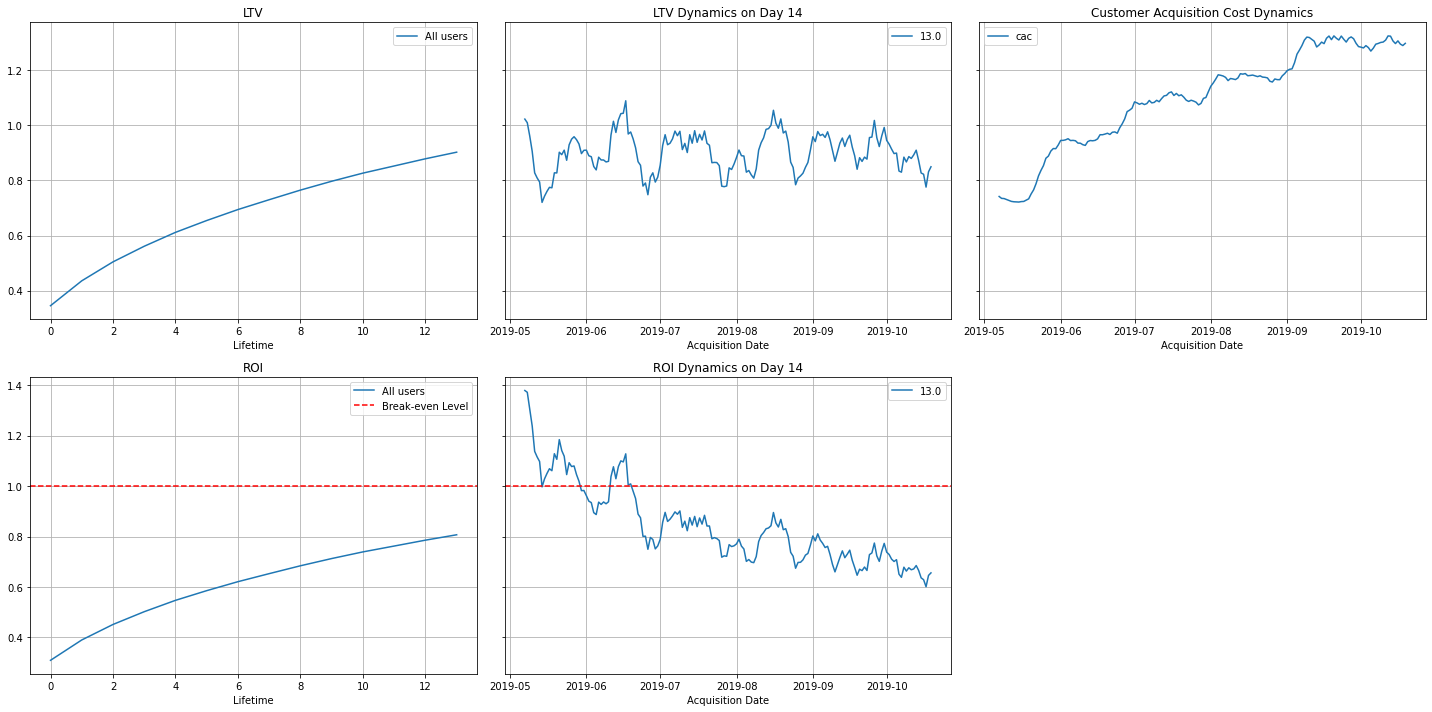

In [37]:
# Generate LTV and ROI charts
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

> - **Advertising is not breaking even.** By the end of the 14-day period, ROI drops below the breakeven level by approximately 18%, indicating insufficient long-term efficiency of the advertising campaigns.
> - ROI was above the profitability threshold only at the beginning of the period. From May to June 2019, it consistently exceeded the breakeven level, but after mid-June, advertising profitability declined **sharply and never recovered**. This could indicate changes in market conditions or an increase in customer acquisition costs.
> - CAC is unstable and shows a **clear upward trend**. The cost of acquiring customers significantly increased starting in June and continued to rise throughout the analysis period. This is a key factor explaining the decline in ROI. A rising CAC without a corresponding increase in LTV makes advertising unprofitable.
> - LTV remains **relatively stable**, but its growth rate is insufficient. Although customer lifetime value shows a positive trend, its growth is not enough to offset the increasing acquisition costs. This suggests that either customers are not spending enough, or efforts should be focused on retention and extending their lifecycle.

### Analyzing Conversion Rates and Retention Trends

In [38]:
# Calculate conversion rates and trends
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

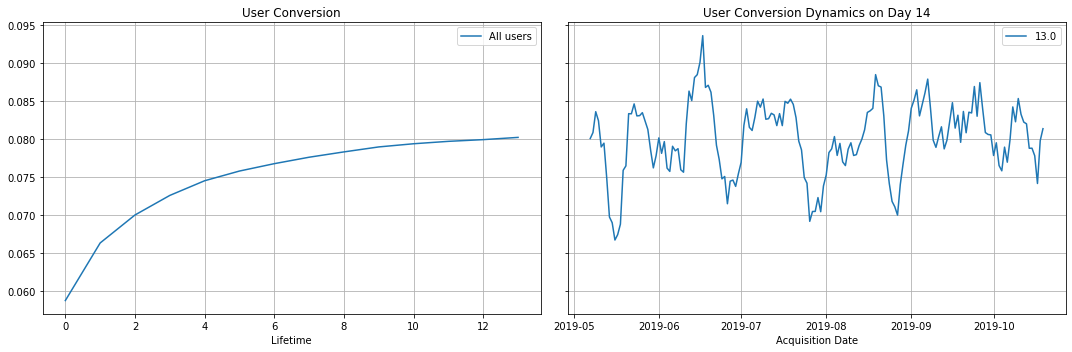

In [39]:
# Plot conversion trends
plot_conversion(conversion_grouped, conversion_history, horizon_days)

> - **User conversion remains relatively low.** Despite a gradual increase over the course of the lifecycle, the overall conversion rate stays below 8.5%. This indicates potential issues with user acquisition or engagement.
> - **A significant drop in conversion occurred in mid-May**, which may indicate changes in marketing campaigns, traffic quality, or external market factors.
> - The peak in conversion in mid-June coincides with the peak in LTV, which may suggest that more valuable users were acquired during this period. This could be the result of a successful marketing campaign or improved product/service conditions.
> - **Conversion is unstable.** The fluctuations in the second graph point to irregularities in the effectiveness of advertising campaigns or variability in user behavior.

### Analyzing User Retention by Payment Behavior

In [40]:
# Calculate retention rates for paying vs. non-paying users
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

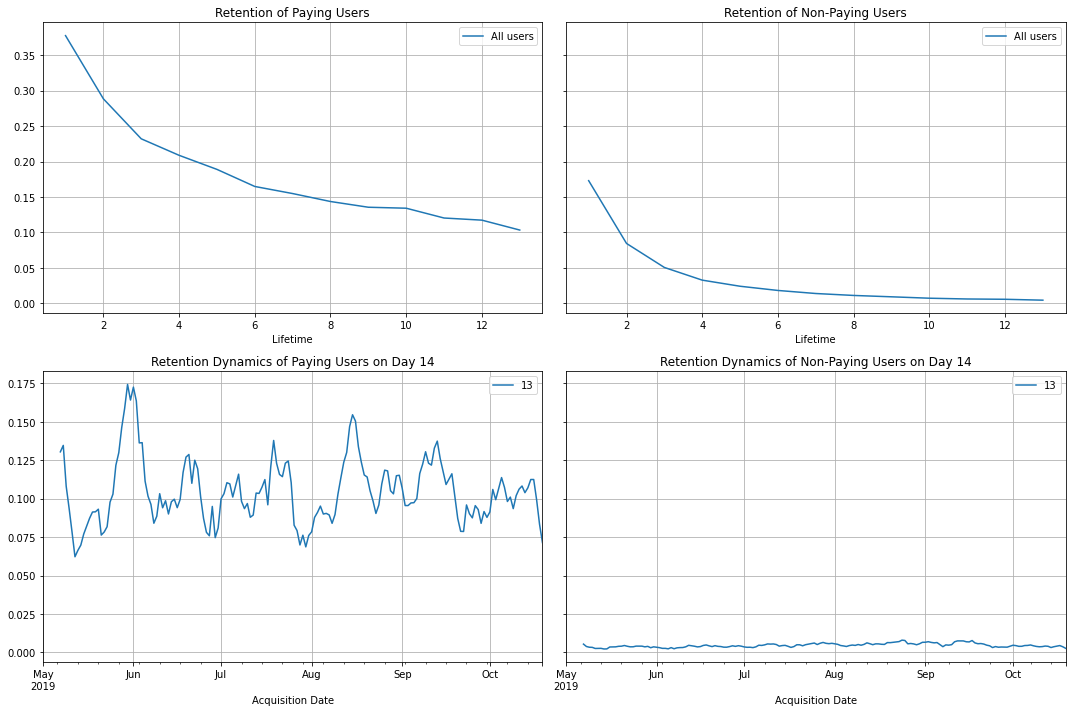

In [41]:
# Plot retention trends
plot_retention(retention_grouped, retention_history, horizon_days)

> No surprises here: **retention of paying users** is higher than that of non-paying users. Additionally, both overall conversion and retention show signs of **seasonality**, with a noticeable **wave-like pattern**.

### Analyzing Conversion and Retention by Device

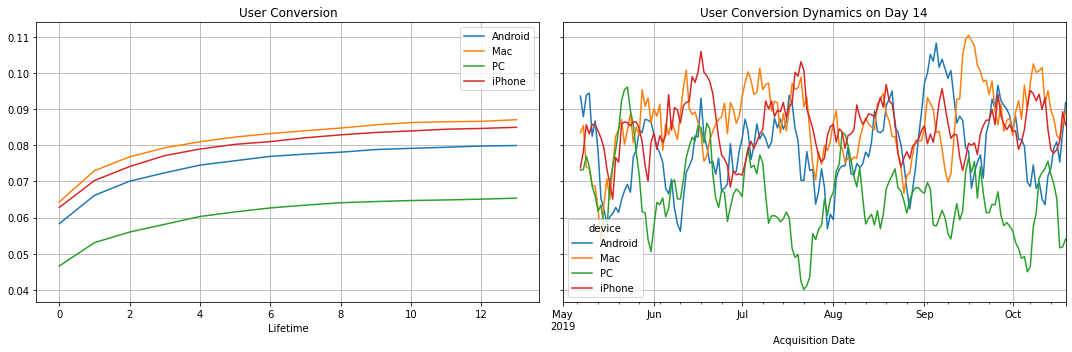

In [42]:
# Conversion by device type
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

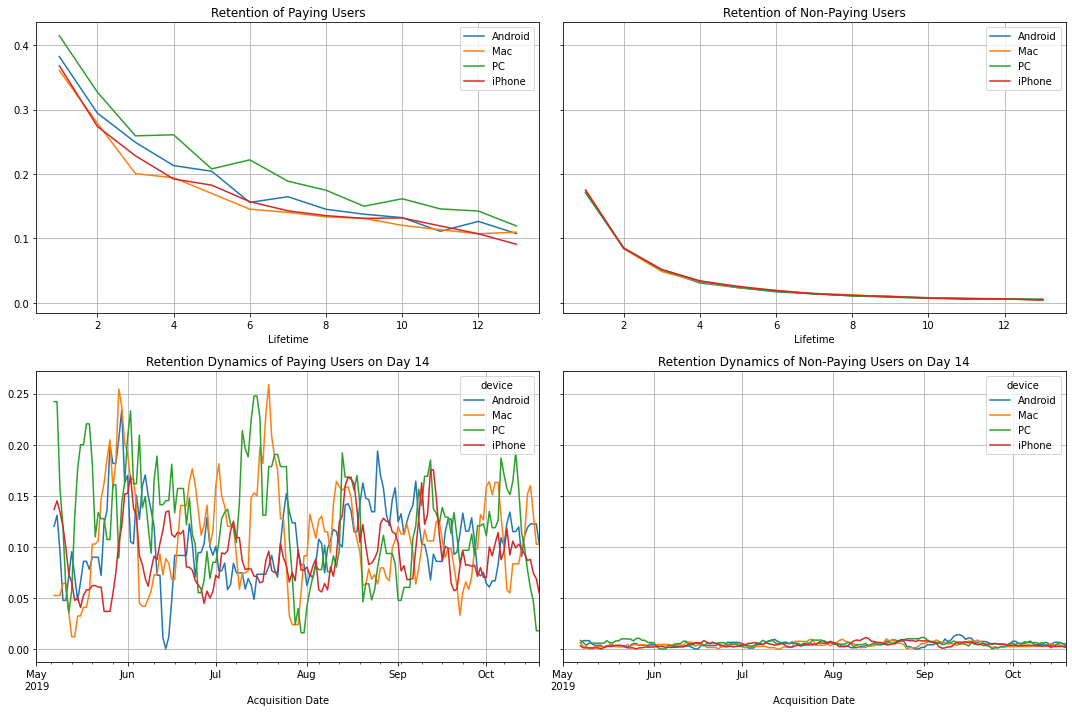

In [43]:
# Retention by device type
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

> - **Mac** users have the highest conversion rates, while **PC** users have the lowest.
> - By the end of July, PC users' **conversion rate dropped to zero—possibly** due to a systemic issue affecting their experience.
> - **Despite the low conversion rate, PC users have the highest retention**, maintaining stable engagement over the entire customer lifecycle.
> - Conversion and retention across devices are relatively stable, so it seems the issue doesn't lie with them.

### Analyzing Conversion and Retention by Region

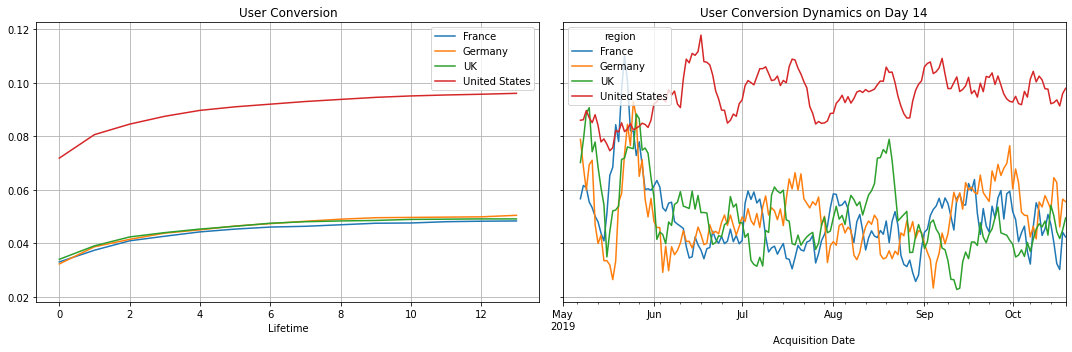

In [44]:
# Conversion by country
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

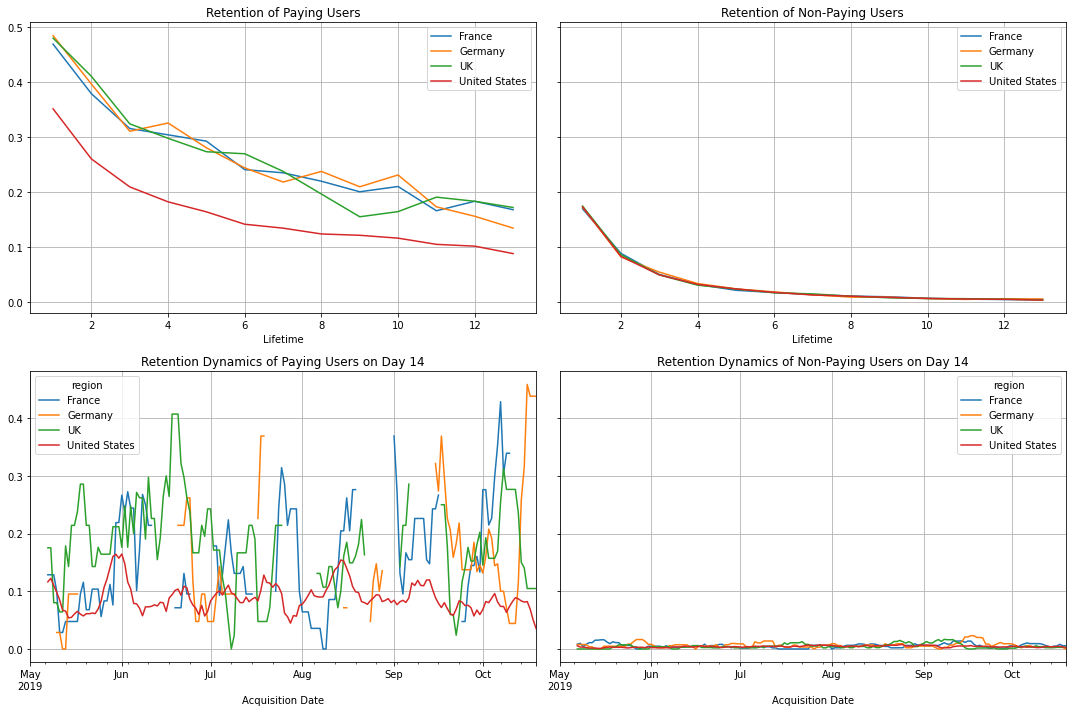

In [45]:
# Retention by country
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

> - Users from the U.S. demonstrate **exceptionally high conversion rates**, outperforming users from other countries by a remarkable 50%. This suggests that U.S. users are more likely to engage with and complete the desired actions, making them a highly valuable segment. However, it's important to note that this impressive conversion rate doesn’t necessarily translate into long-term customer loyalty or retention.
> - French users also experienced a notable spike in conversion rates around mid-May, indicating that, at that time, the marketing efforts or product offerings resonated particularly well with this group. However, after this peak, the **conversion rates for French users declined**, suggesting that the initial attraction may have been more driven by a short-term factor such as a promotional event or seasonal interest, rather than sustained engagement.
> - When it comes to retention, U.S. users again stand out, but in a less favorable light. Despite their high conversion rates, they exhibit the **lowest retention rates among all countries**, signaling a potential challenge in maintaining their engagement over time. This could indicate issues related to customer satisfaction, product fit, or competitive offerings that may cause U.S. users to disengage faster than users from other countries. In contrast, other regions may see more stable, though lower, conversion rates paired with better retention, highlighting a possible area of focus for improving long-term customer loyalty.

### Analyzing Conversion and Retention by Marketing Channel

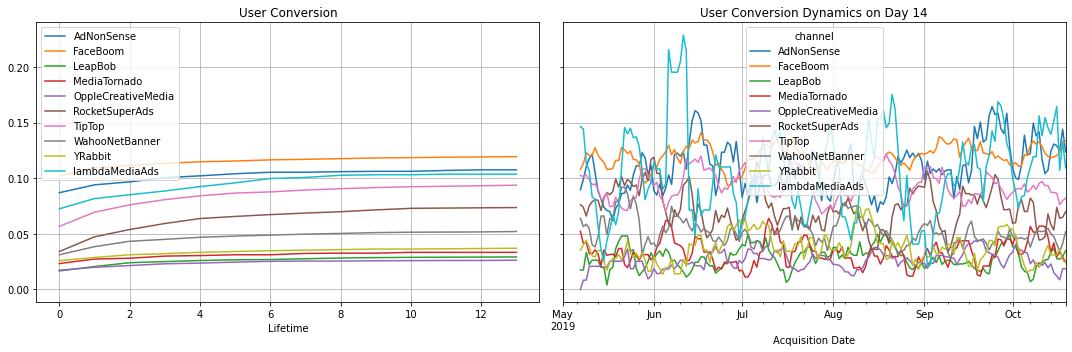

In [46]:
# Conversion by marketing channel
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

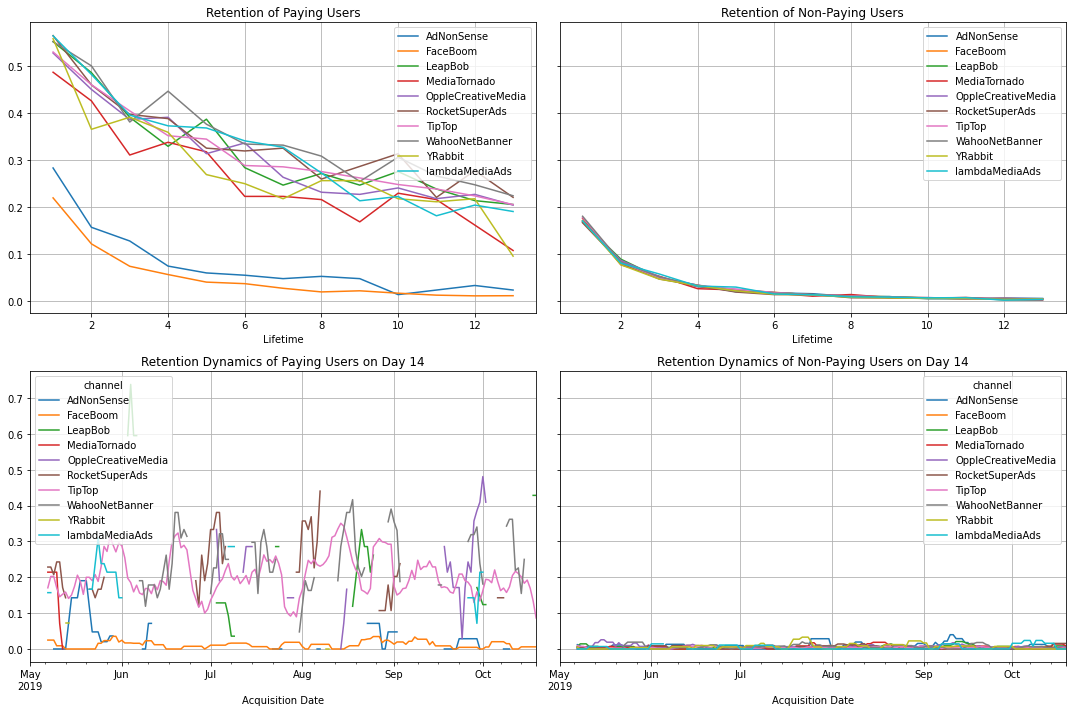

In [47]:
# Retention by marketing channel
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

> - **FaceBoom** stands out as the most effective marketing channel in terms of conversion rate, consistently driving the highest level of engagement and turning a substantial proportion of users into paying customers. This suggests that FaceBoom’s targeting, messaging, or overall approach resonates well with users, successfully attracting individuals who are more likely to make purchases. This makes FaceBoom a highly valuable acquisition channel, especially when aiming for quick conversions and immediate sales. However, despite its success in attracting paying customers, the platform faces significant challenges in retaining those users long-term.
> - On the flip side, **OppleCreativeMedia** has the lowest conversion rate, indicating that the marketing efforts or user targeting through this channel are less effective at turning users into paying customers. This could suggest a mismatch between the type of audience attracted and the offerings provided or a lack of engagement tactics that appeal to users long enough to drive conversions. 
> - In terms of retention, both **AdNonSense** and **FaceBoom** perform poorly, with the latter particularly noteworthy due to its high conversion but low retention. This means that while FaceBoom successfully attracts paying users initially, it struggles to keep them engaged and loyal over time. 

### Analyzing Ad Profitability by Device

- Let's first break down ad profitability by device. We will construct LTV and ROI graphs, as well as graphs showing the dynamics of LTV, CAC, and ROI.

In [48]:
# Analyze ad profitability by device
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

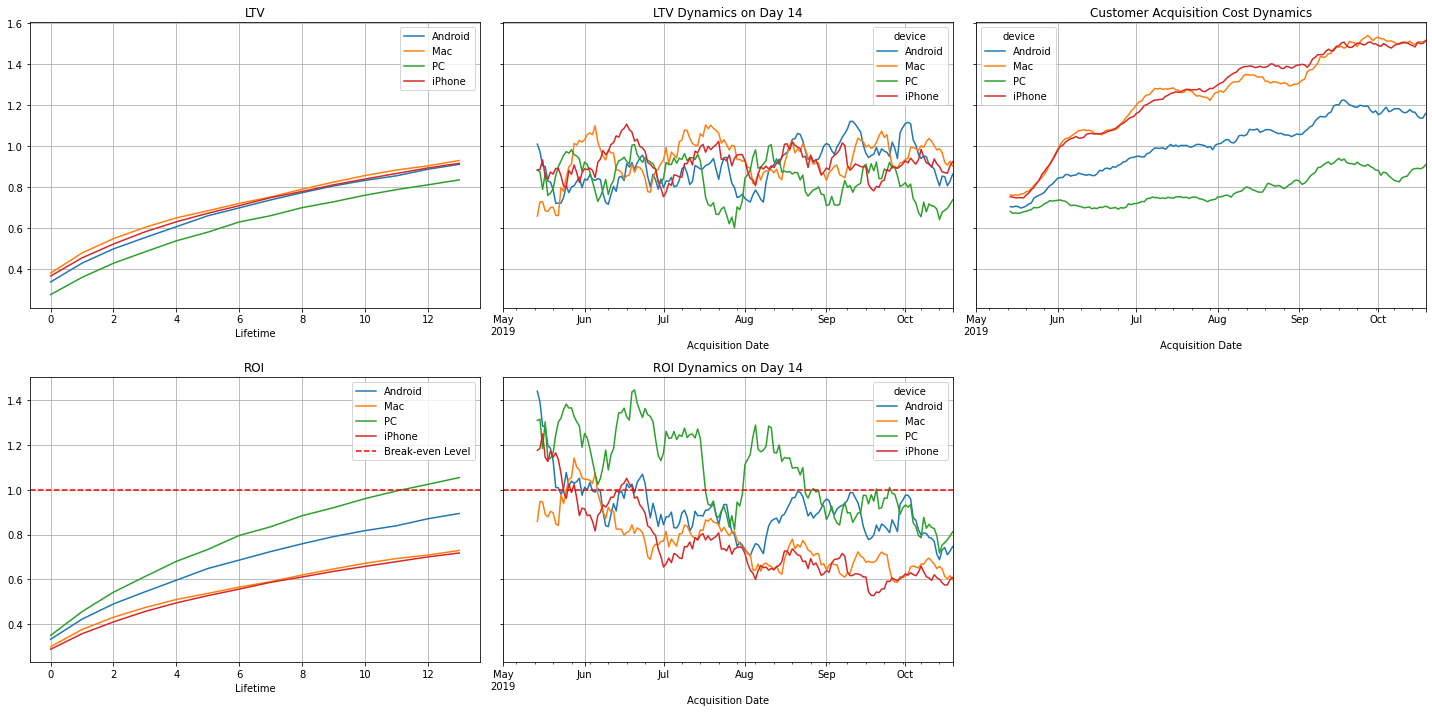

In [49]:
# Plot LTV and ROI graphs for devices
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

> - **The lowest LTV is observed among PC users**, who bring in the least revenue for the company. However, it’s interesting that only PC users manage to break even (ROI crosses the breakeven point). This suggests that while these users do not generate high revenue, the relatively low cost of acquiring them allows for a breakeven situation. The key takeaway here is that, even with lower spending, the lower acquisition cost associated with PC users enables the company to avoid a net loss, unlike other devices where costs may be higher than the returns. 
> - If we look at the **dynamics of customer acquisition costs**, we find that the cost of acquiring PC users is much lower compared to Apple users. This could be due to a variety of factors, including the nature of advertising platforms, targeting effectiveness, and competition for Apple users. Since PC users come at a lower cost, their acquisition is more cost-efficient, even though they generate lower revenue per user. On the other hand, Apple users appear to be more expensive to acquire, which may be due to higher competition in acquiring users from premium platforms or the effectiveness of targeting high-value Apple users. While this could potentially generate higher LTV in the long run, the disparity in acquisition costs creates a more challenging profitability landscape for Apple users. If the company cannot generate sufficiently high revenue from Apple users to offset the acquisition costs, the overall advertising efforts targeting this segment could still result in a loss.

### Analyzing Ad Profitability by Country

- Now, let's examine the ad profitability broken down by country. We will again construct LTV and ROI graphs, along with the dynamics of LTV, CAC, and ROI.

In [50]:
# Analyze ad profitability by region
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

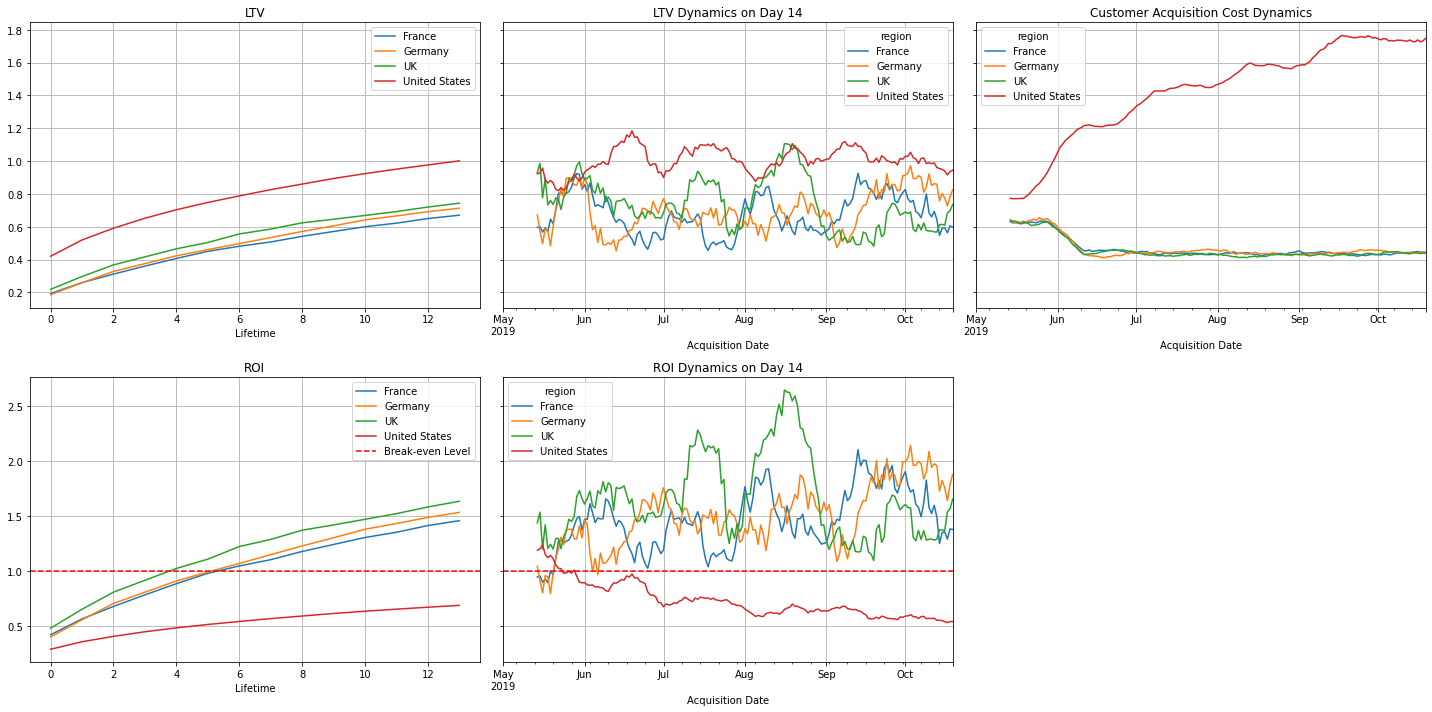

In [51]:
# Plot LTV and ROI graphs for countries
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

> - **Focus on users from the U.S.** U.S. users stand out as the highest revenue-generating segment for the company, with their LTV (lifetime value) being approximately 23% higher than users from other regions. This higher LTV indicates that users from the U.S. are more likely to make significant purchases or engage with the product over an extended period. This suggests that, despite the higher initial cost of acquisition, U.S. customers contribute substantially to the long-term revenue of the company. Therefore, even though U.S. customers appear to be a premium segment in terms of revenue potential, it’s important to recognize the delicate balance between acquisition costs and the return on investment generated by this group.
> - **High cost of acquiring U.S. customers.** Despite their high LTV, the cost of acquiring U.S. customers is significantly higher compared to users from other countries. This disparity in customer acquisition costs is several times greater than the costs for users from regions such as Europe or Asia. This could be due to the increased competition for U.S. users, who may be targeted by a wider variety of companies with higher marketing budgets and more aggressive advertising strategies. Additionally, advertising in the U.S. may be more expensive due to the saturated market, premium ad placements, or the use of higher-cost platforms aimed at reaching more affluent audiences.
> - **Advertising for U.S. users is less profitable.** Given that the cost of acquiring U.S. customers is so high, advertising aimed at this group becomes less profitable when compared to other regions. While U.S. users bring in the highest revenue, the ROI (return on investment) for advertising in the U.S. is lower than for other regions. This is because the high acquisition costs make it harder to achieve a positive return, despite the high LTV. In contrast, regions with lower acquisition costs may show more profitable outcomes because the return generated from each customer is comparatively higher relative to the investment made in acquiring them.

### Analyzing Ad Profitability by Channel

- Let's break down ad profitability by acquisition channels. We will again construct LTV and ROI graphs, along with the dynamics of LTV, CAC, and ROI.

In [52]:
# Analyze ad profitability by channel
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

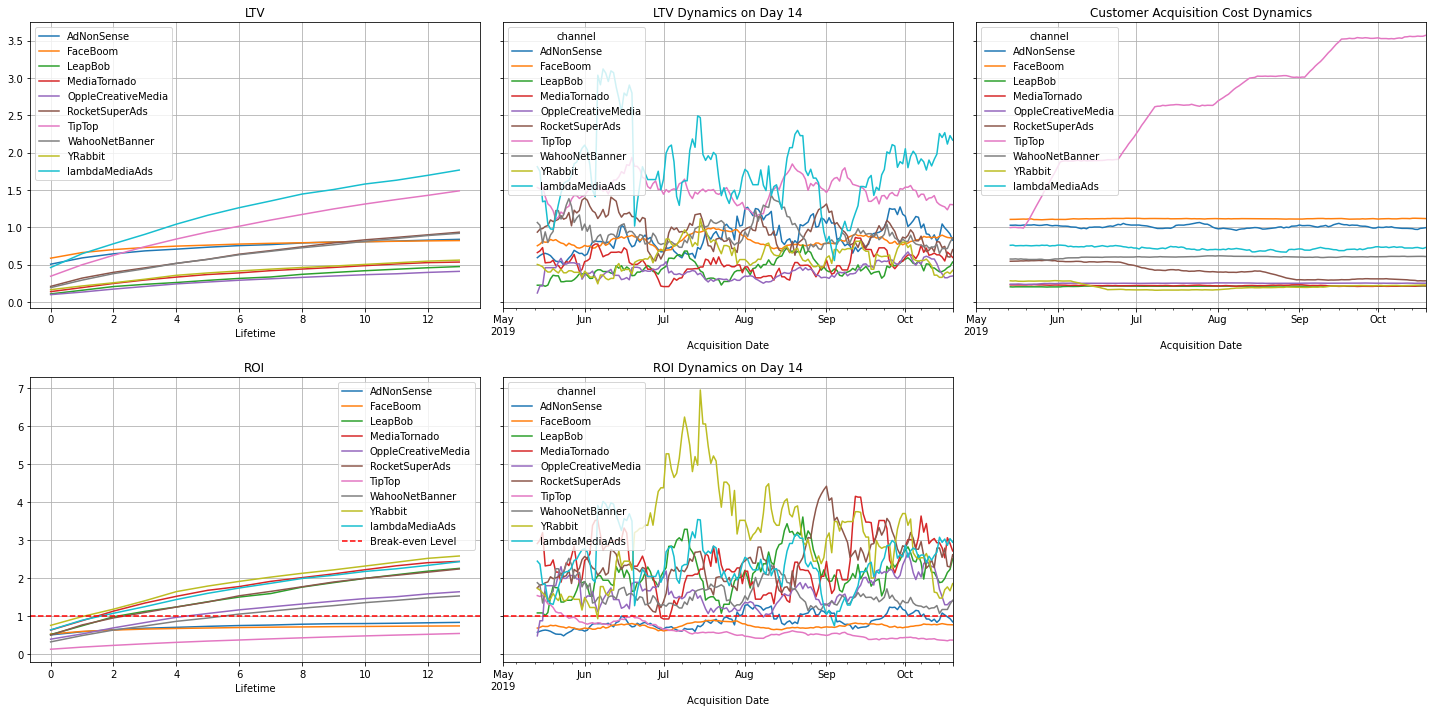

In [53]:
# Plot LTV and ROI graphs for acquisition channels
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

> - **Sharp rise in the cost of the TipTop channel.** Since June, the cost of acquiring customers through the TipTop channel has significantly increased. This sharp rise is likely linked to a shift in the customer base being targeted by this channel, particularly the acquisition of U.S. users. As mentioned earlier, U.S. users tend to have much higher acquisition costs due to the competitive nature of the market. 
> - **TipTop's low LTV.** Despite the substantial rise in acquisition costs, the lifetime value (LTV) for customers acquired via the TipTop channel does not show strong results. In fact, the LTV for this channel is underperforming relative to other sources, with AdNonSense leading in terms of LTV. This suggests that although TipTop is attracting a larger and potentially more profitable audience (such as U.S. users), these customers are not staying engaged or are not generating as much long-term revenue as customers from other channels. This lack of strong LTV performance undermines the profitability of the channel, as it suggests that TipTop is bringing in a lot of customers without fostering deep, sustained relationships that would justify the high acquisition cost.
> - **Unprofitability of TipTop.** In addition to the lack of strong LTV, the TipTop channel has become unprofitable for the company, especially in the recent months. This is largely due to the mismatch between the rising acquisition costs and the relatively low LTV from this channel. As the costs of acquiring customers from TipTop continue to grow, but the revenue generated from these customers (LTV) does not increase proportionately, the overall return on investment (ROI) for TipTop becomes increasingly negative. This makes the channel unsustainable in the long term unless changes are made to either reduce customer acquisition costs, improve customer retention, or enhance the monetization of the customers acquired through this channel.
> - **Strong ROI from the YRabbit channel.** On the other hand, the YRabbit channel is demonstrating one of the best ROI results. Unlike TipTop, YRabbit seems to be attracting customers at a more cost-effective rate while still generating a good return in terms of revenue. The high ROI suggests that YRabbit is not only acquiring customers at a lower cost but is also able to maintain a profitable relationship with them over time. This makes the YRabbit channel particularly valuable as it offers a more sustainable model for acquiring customers, with a better balance between cost and return.

### Answering Key Questions

#### Is the advertising overall profitable?

No, the advertising is not profitable overall. The primary reason for this is the underperformance of the TipTop channel, which has become a significant drag on profitability. While the company continues to invest more in advertising, especially through TipTop, the returns from this source remain low, and even declining in some cases. This mismatch between rising customer acquisition costs (CAC) and relatively low lifetime value (LTV) from TipTop leads to overall negative return on investment (ROI). The increasing costs of this channel, particularly since June, have offset the benefits of attracting new customers, making it difficult for the company to achieve profitability across its advertising efforts. Furthermore, while other channels such as YRabbit show better ROI, the unprofitability of TipTop heavily weighs down the overall advertising performance.

#### Which devices, countries, and channels negatively impact ad profitability?

Several factors contribute to the negative impact on advertising profitability:

- **Countries.** The U.S. is the most significant negative factor. While U.S. users generate the highest LTV (about 23% higher than users from other regions), they are also the most expensive to acquire, resulting in high customer acquisition costs (CAC). This makes it difficult for the company to break even on these users. Despite their high revenue potential (LTV), the high acquisition costs related to the U.S. market make advertising aimed at this group less profitable overall.

- **Devices.** Interestingly, device type doesn’t seem to have as pronounced an impact on profitability, though there are some differences. Apple users tend to generate the highest LTV, indicating that they are valuable customers over the long term. However, they don’t break even due to their high acquisition costs, particularly when compared to devices like PCs. On the other hand, PC users bring in the least revenue (LTV) but have lower acquisition costs, which allows them to break even. So, while no device category has an outright negative impact on profitability, the high acquisition costs for Apple users and the low LTV for PC users create a complex balance that affects the overall advertising outcomes.

- **Channels.** The TipTop channel is the most damaging to profitability, primarily due to its high acquisition costs, especially as the company shifted focus toward acquiring U.S. users. Despite this, TipTop’s LTV performance remains low, with AdNonSense actually leading in terms of LTV. This channel’s unprofitability is exacerbated by the fact that the ROI from TipTop has drastically declined, especially in recent months. The YRabbit channel, by contrast, is one of the most profitable channels in terms of ROI, showing strong returns despite lower customer acquisition costs.

#### What might be causing the profitability issues?

Several factors are contributing to the advertising profitability challenges:

1. **Over-reliance on expensive sources like TipTop.** One of the primary causes of the profitability issue is the use of high-cost advertising sources, specifically TipTop. While the channel was initially successful, the recent shift in focus toward acquiring more U.S. customers has led to skyrocketing acquisition costs. These higher costs are not offset by corresponding increases in LTV, making the channel increasingly unprofitable. When the company increased its investment in TipTop, the returns failed to keep pace with the rising costs, leading to a decrease in overall advertising profitability.

2. **Mismatch between customer acquisition costs and LTV.** The escalating costs of acquiring users, especially in the U.S., are not being compensated by higher LTV. While U.S. users have high LTV, the disproportionate increase in their acquisition costs has resulted in negative ROI. This lack of alignment between CAC and LTV has led to a scenario where the advertising campaigns, particularly those targeting U.S. users through TipTop, are no longer sustainable or profitable.

3. **Inability to scale profitable channels.** While channels like YRabbit show high ROI and relatively lower acquisition costs, the company has not been able to scale these efforts sufficiently to offset the losses from TipTop. This suggests a strategic misalignment where resources are being allocated to less profitable channels instead of scaling those that offer better returns.

4. **Rising competition and market saturation.** The rise in acquisition costs might also be linked to increased competition in key markets, particularly the U.S. As the company increases its advertising spend on channels like TipTop, it faces higher competition for ad placements and higher bids to acquire users. This competitive pressure drives up costs without necessarily leading to a corresponding increase in returns.

## Conclusions

**Reasons for Inefficient User Acquisition:**

The analysis of advertising channels reveals that the company did not conduct a proper performance evaluation of its acquisition sources. A significant portion of the budget (around 55k out of 105k) was allocated to the TipTop channel, which did not yield satisfactory results. The increasing spend on this channel was not justified by any significant improvement in LTV or ROI. As a result, a large portion of the advertising budget was spent on a less effective channel, leading to an overall decline in the profitability of advertising efforts.

**Recommendations for the Marketing Department:**

1. **Reevaluate Strategy for the U.S. Market.**
U.S. users have a high LTV, but also very high acquisition costs, resulting in negative ROI. To improve advertising profitability, it is necessary to reconsider the strategy for acquiring these users. It is recommended to focus on budget-friendly yet effective sources. For example, investigate cheaper channels with low CAC, which can deliver a higher number of high-quality users at lower costs. Additionally, it is essential to diversify the advertising budget and redistribute it across more profitable channels, considering their performance across regions.

2. **Optimize Spending on TipTop and Other Sources.**
Since TipTop remains a high-cost channel with low LTV, it is recommended to reassess investments in this source or even exclude it from the advertising strategy entirely. It might be more beneficial to invest in more effective channels that yield higher ROI, such as YRabbit, which showed good results, and evaluate sources that perform better in other countries.

3. **Diversify and Balance Advertising Sources.**
It is important not to rely on a single source, as this can lead to over-dependence on less efficient channels. It is recommended to diversify the strategy across different sources, countries, and devices. For example, since Apple users have a high LTV, it might be worth exploring additional strategies to reduce their CAC, such as using cheaper channels or targeting different audience segments.

4. **Continuous Monitoring and Source Evaluation.**
Implementing regular performance analysis of advertising sources is crucial. This will allow the marketing department to track in real-time which channels deliver the best returns and where optimization opportunities exist. This approach will help in effectively reallocating budgets and improving ROI at various stages of advertising campaigns.